In [90]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from propagator import angular_spectrum_band_limited
from skimage.restoration import unwrap_phase

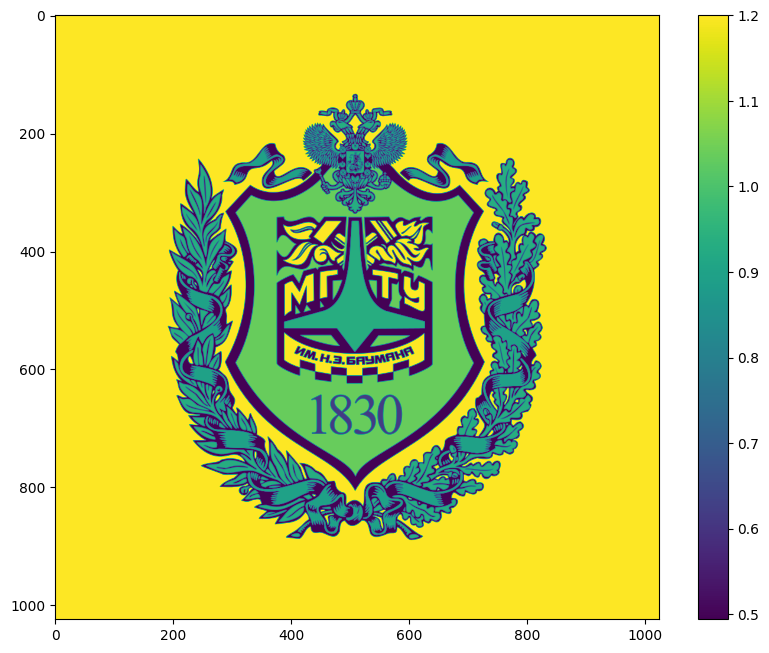

In [101]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('../generation/fields/bmstu_phase_noise_intensity/BMSTU_phase_big_noise_intensity.npy')
phase = unwrap_phase(np.angle(complex_field))
plt.imshow(phase)
plt.colorbar()
plt.show()

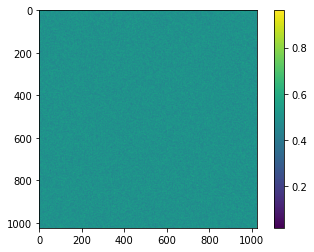

In [102]:
intensity = np.abs(complex_field) ** 2
plt.imshow(intensity)
plt.colorbar()
plt.show()

In [103]:
start=-0.0008  # -800 mkm
stop=0.0008  # 800 mkm
step=0.0008 # 800 mkm

px_size = 0.000005  # 5 mkm
wavelength = 0.000000555  # 555 nm

complex_field = np.load('../generation/fields/bmstu_phase_noise_intensity/BMSTU_phase_big_noise_intensity.npy')

distances = np.arange(start, stop + step, step)
for distance in distances:
    wave_z = angular_spectrum_band_limited(complex_field, distance, wavelength, px_size)
    filename = f'z={distance * 1000:.4f}.npy'
    save_path = os.path.join('propagated_fields/bmstu_phase_big_noise_intensity/', filename)
    np.save(save_path, wave_z)

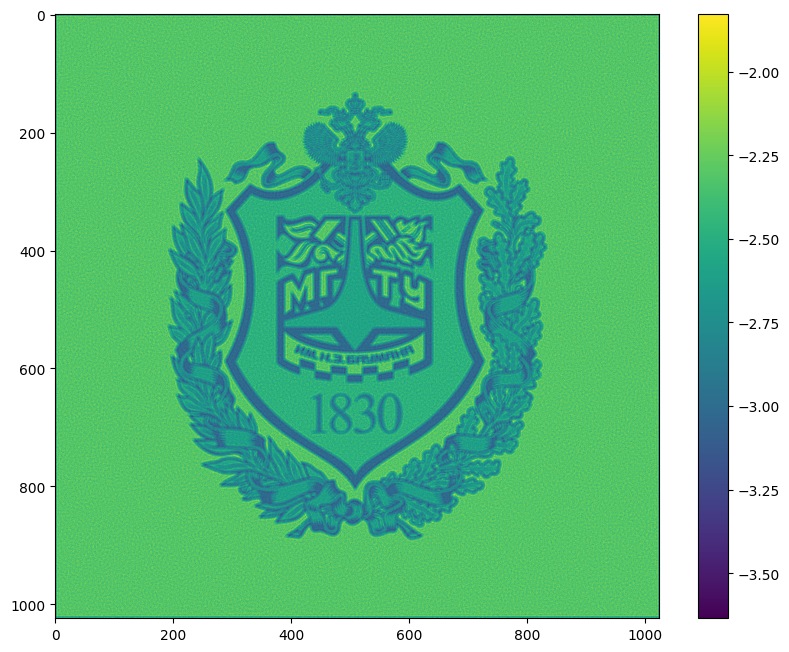

In [104]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('propagated_fields/bmstu_phase_big_noise_intensity/z=0.8000.npy')
phase = unwrap_phase(np.angle(complex_field))
plt.imshow(phase)
plt.colorbar()
plt.show()

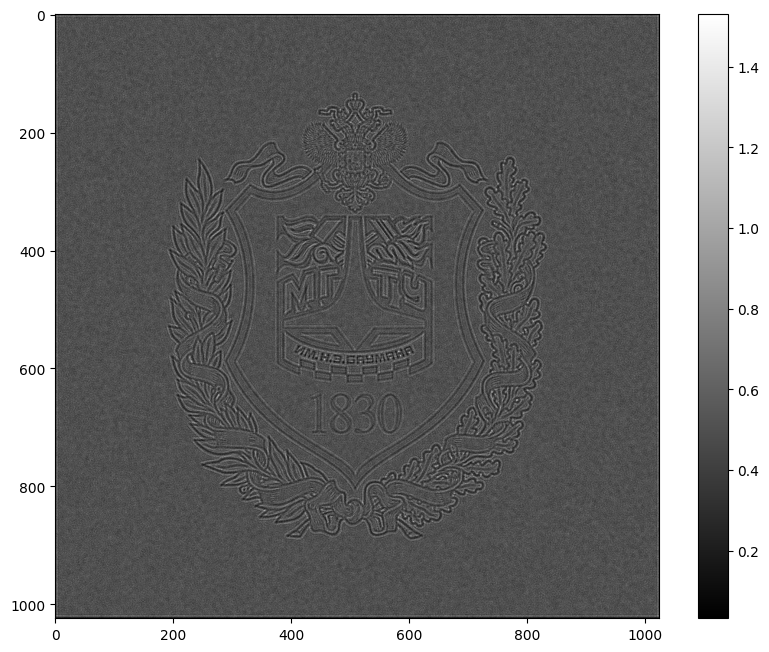

In [105]:
figure(figsize=(10, 8), dpi=100)
complex_field = np.load('propagated_fields/bmstu_phase_big_noise_intensity/z=0.8000.npy')
phase = np.abs(complex_field) ** 2
plt.imshow(phase, cmap='gray')
plt.colorbar()
plt.show()